In [56]:
import pandas as pd

# Importing the dataset

In [57]:
data = pd.read_csv('/kaggle/input/spambase/spambase_csv.csv')

In [58]:
data.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


# Dealing with Null Values

In [59]:
print("Null values : ",data.isnull().sum())

Null values :  word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet         

# Dealing with Duplicates

In [60]:
print("Duplicate values : ",data.duplicated().sum())

Duplicate values :  391


In [61]:
data = data.drop_duplicates(keep='last')

In [62]:
print("Duplicate values : ",data.duplicated().sum())

Duplicate values :  0


# Plotting the Columns to check if they follow Normal Distribution

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

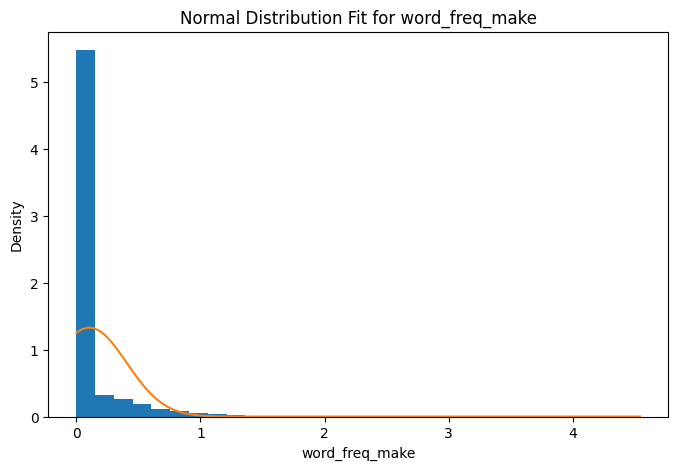

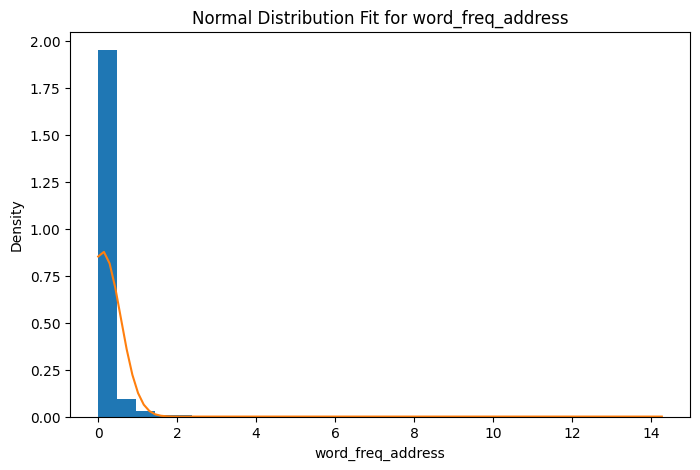

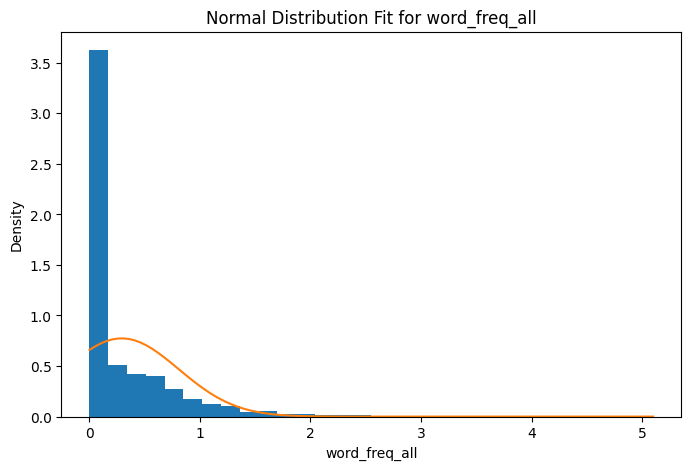

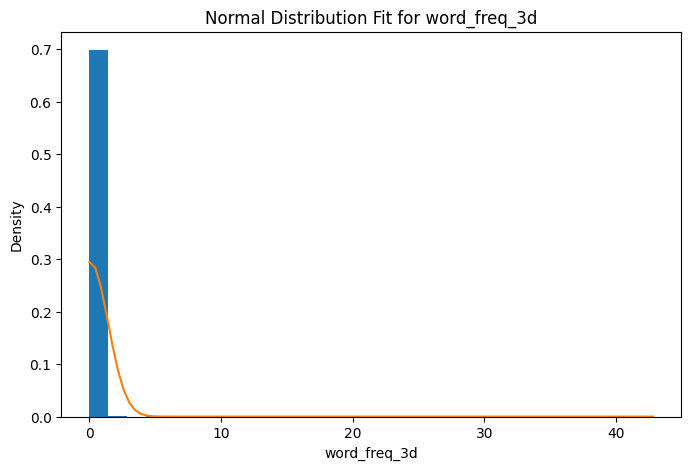

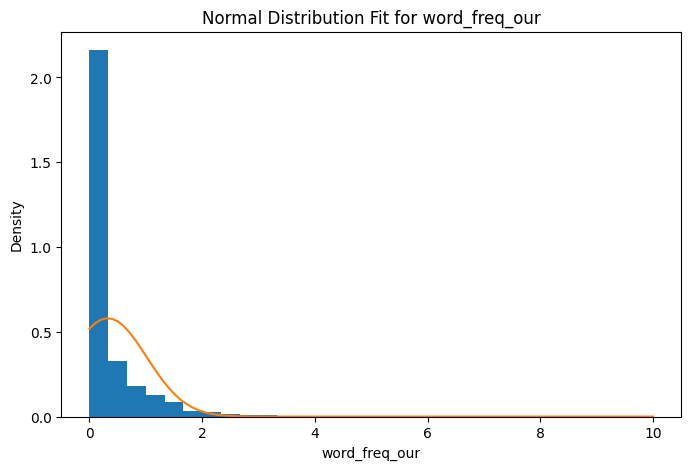

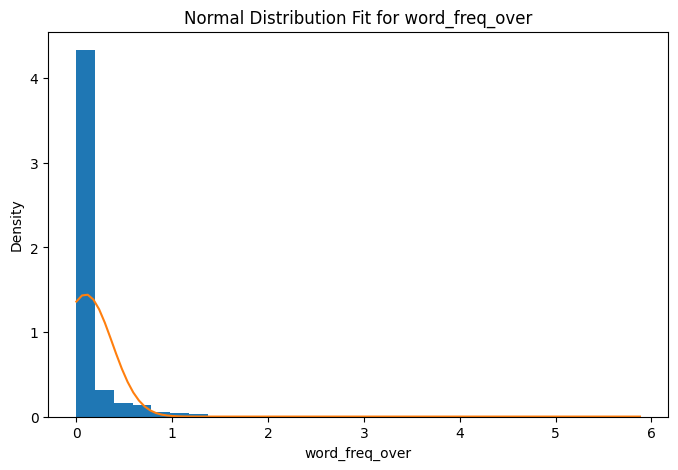

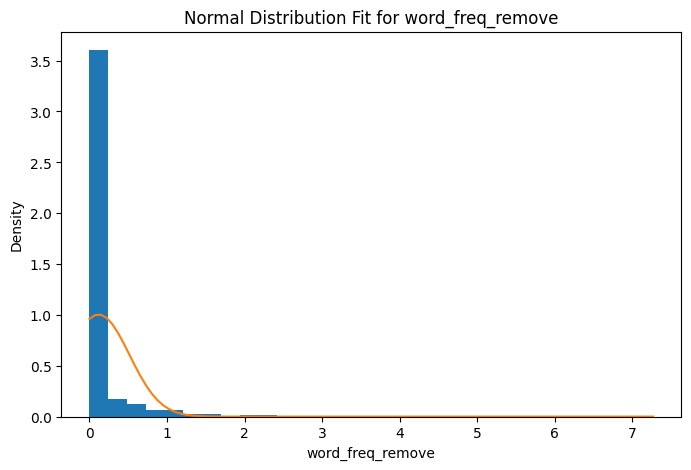

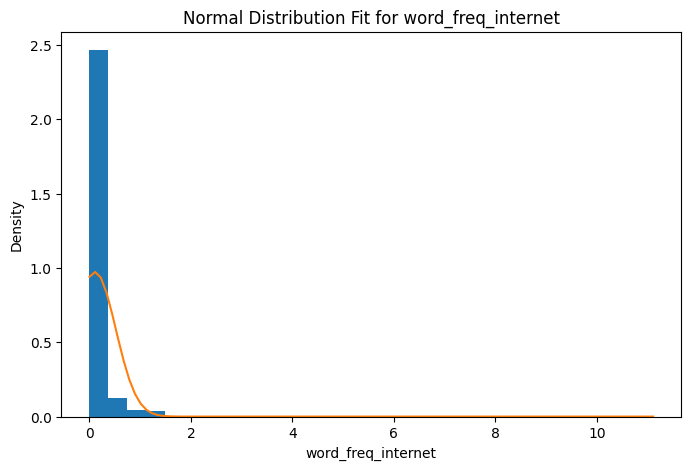

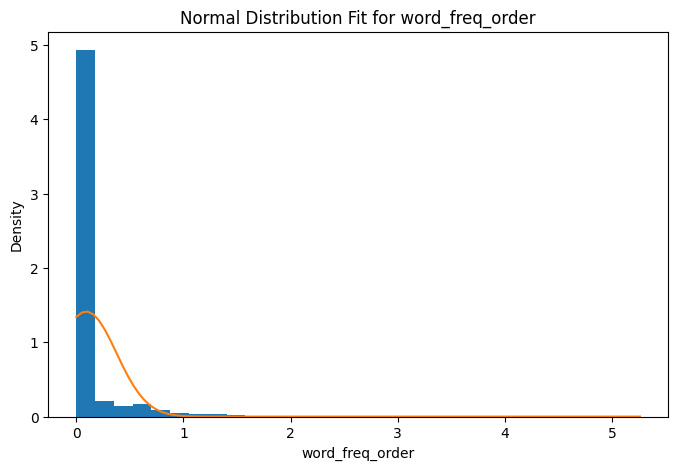

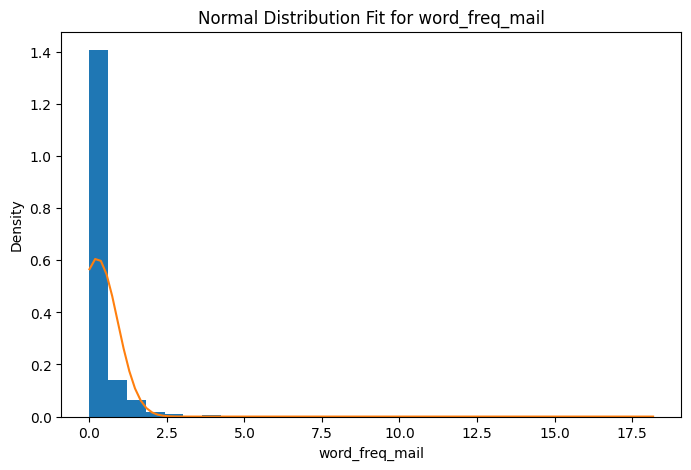

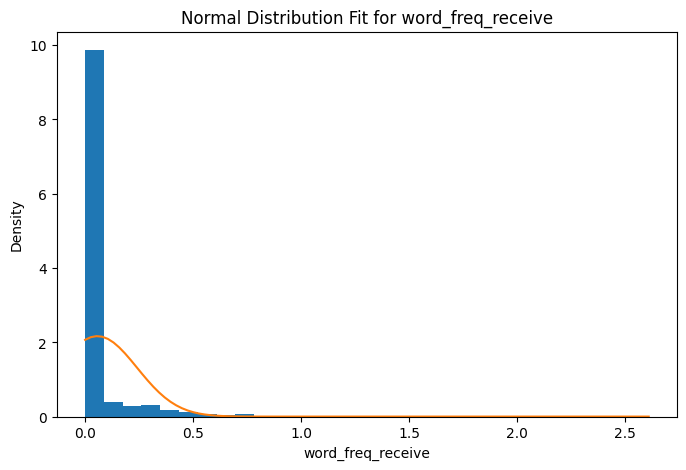

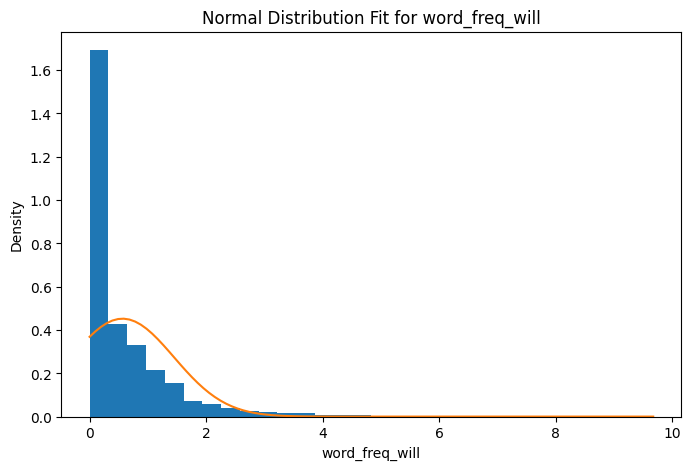

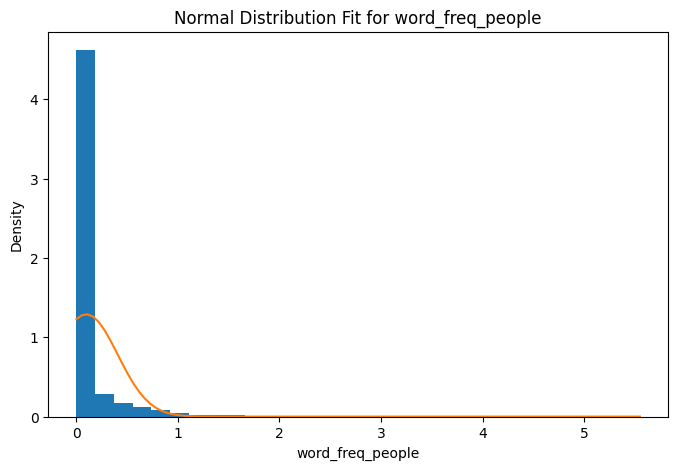

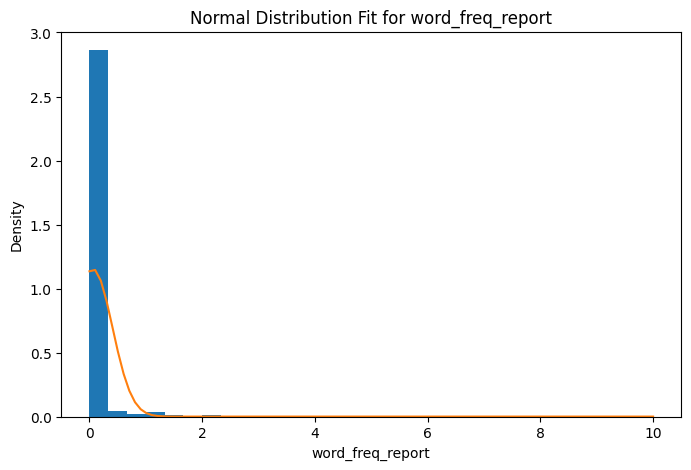

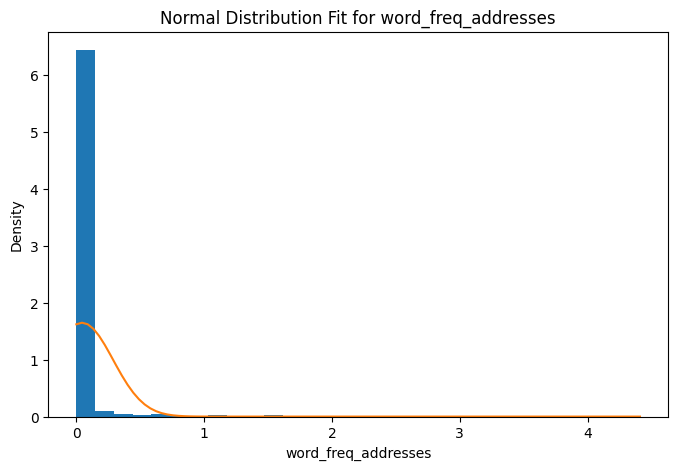

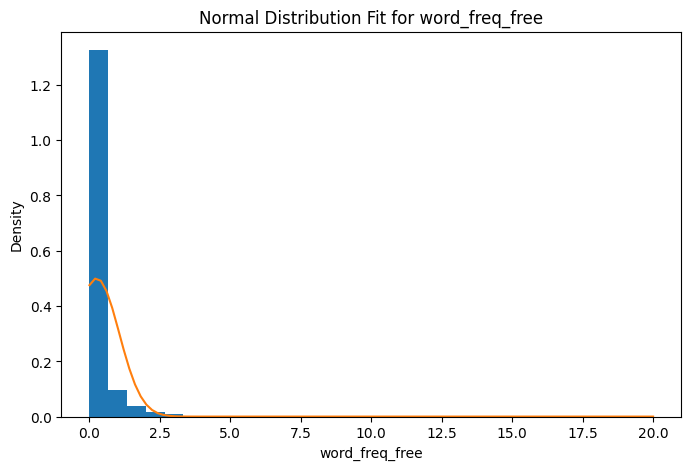

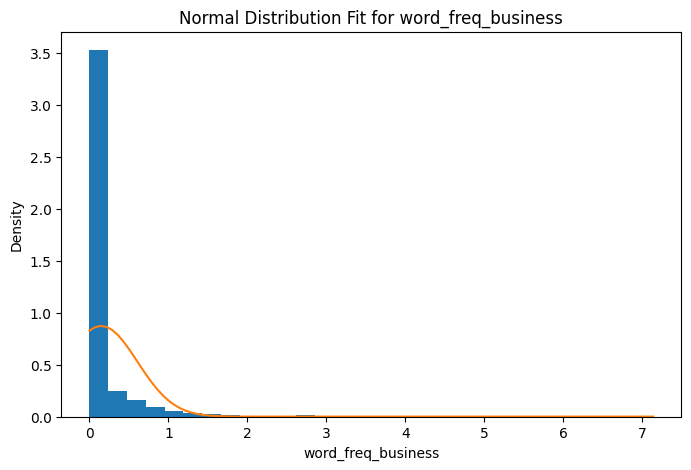

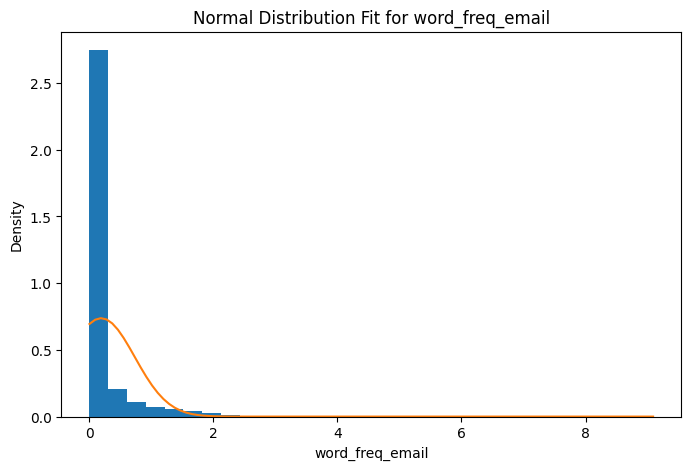

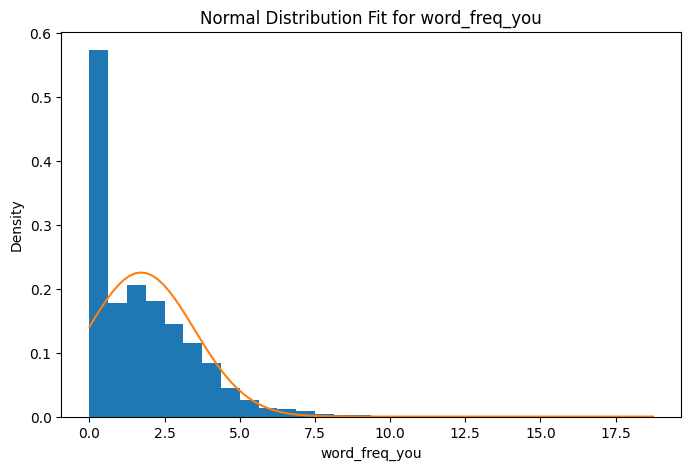

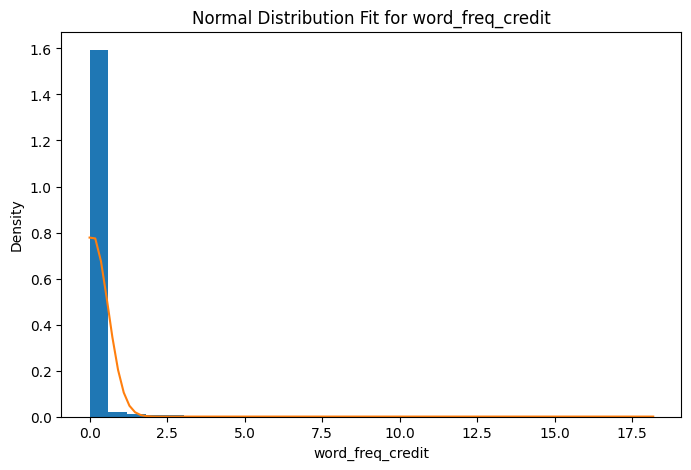

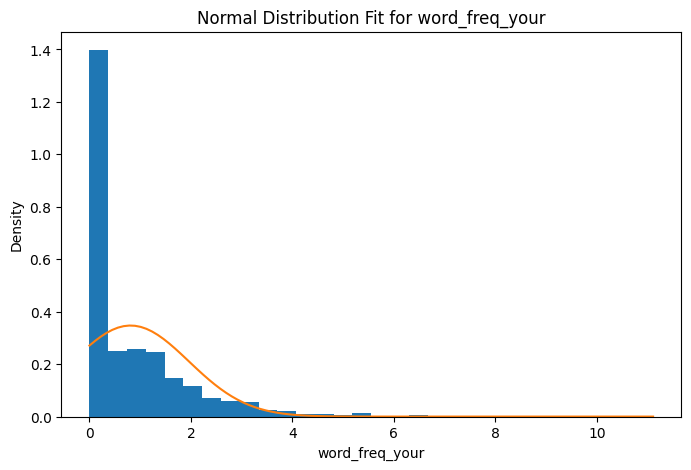

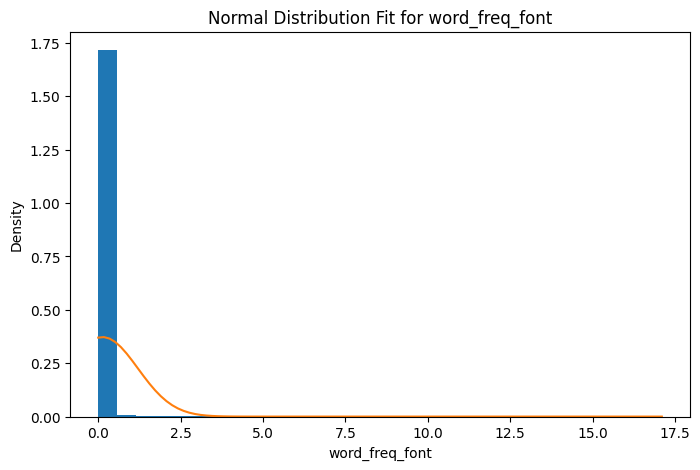

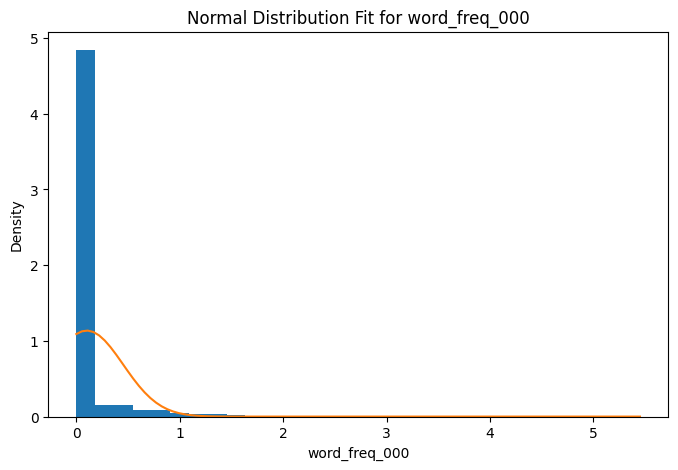

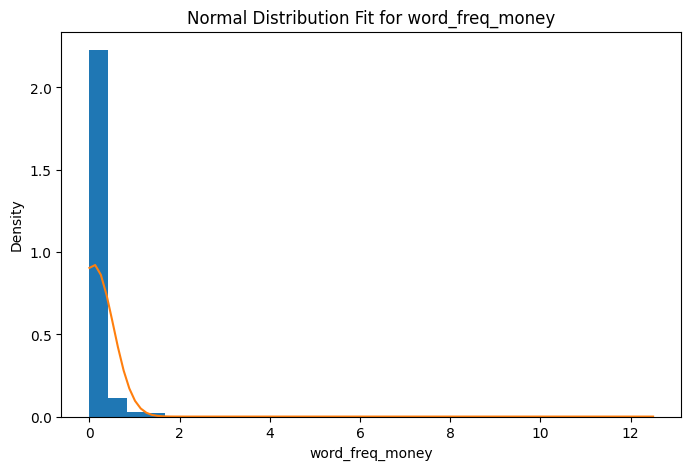

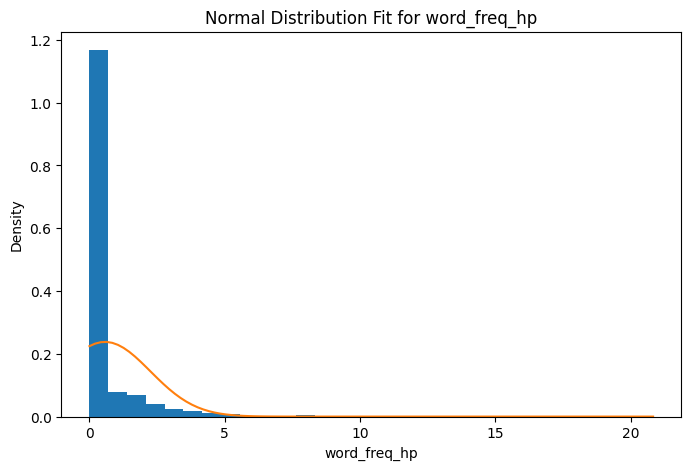

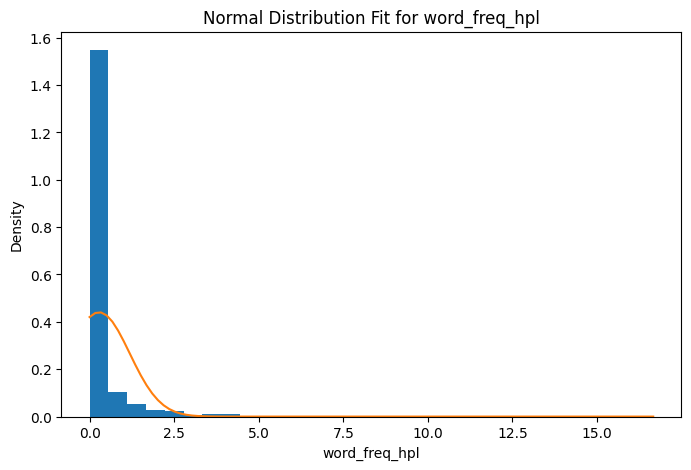

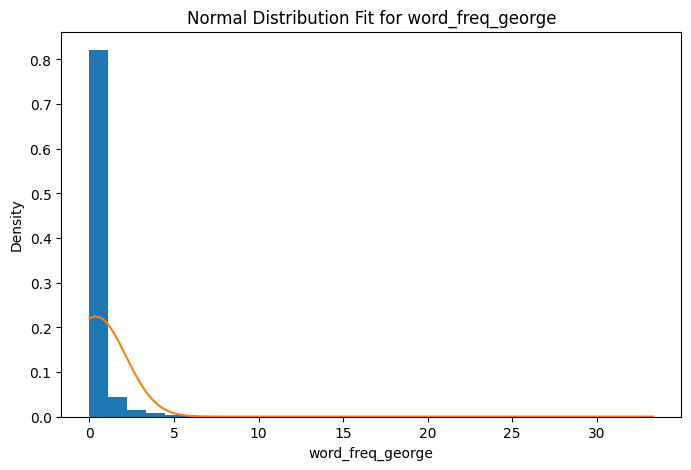

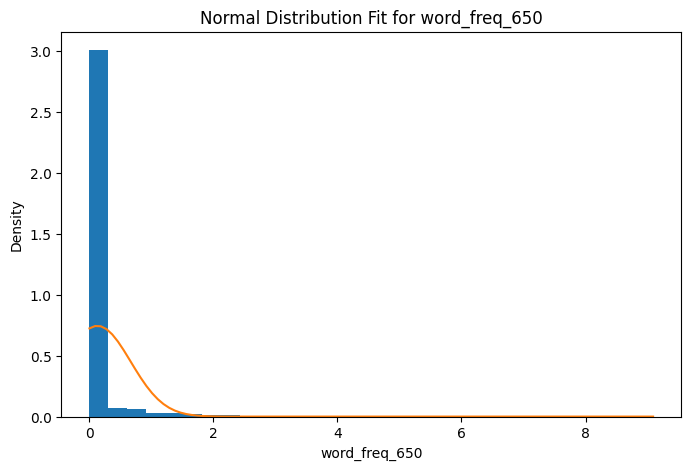

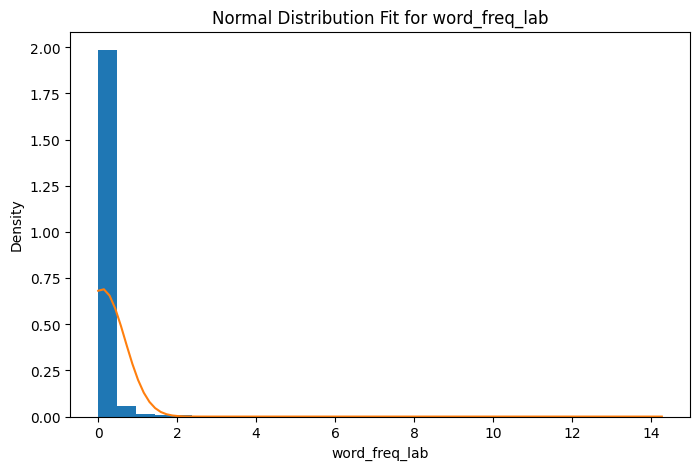

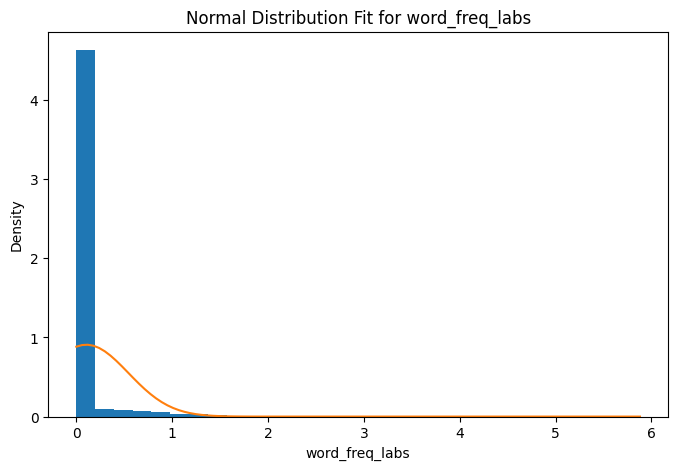

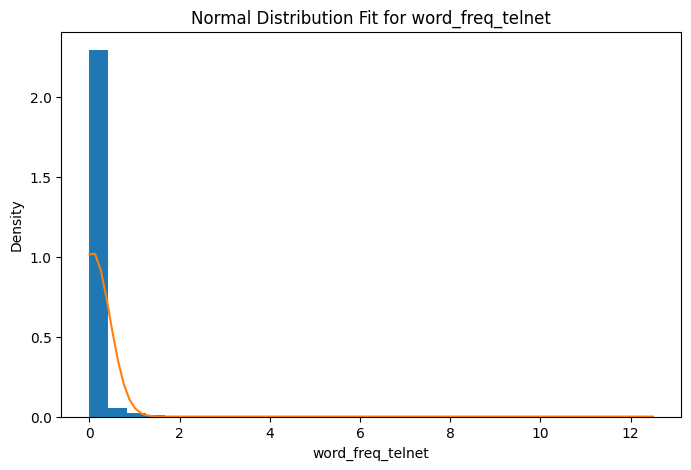

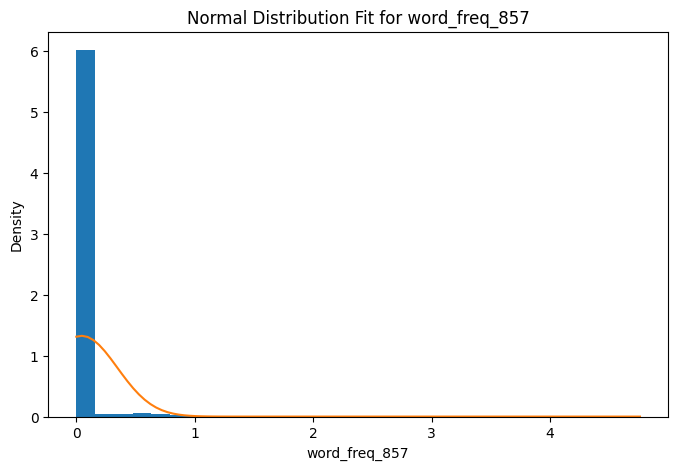

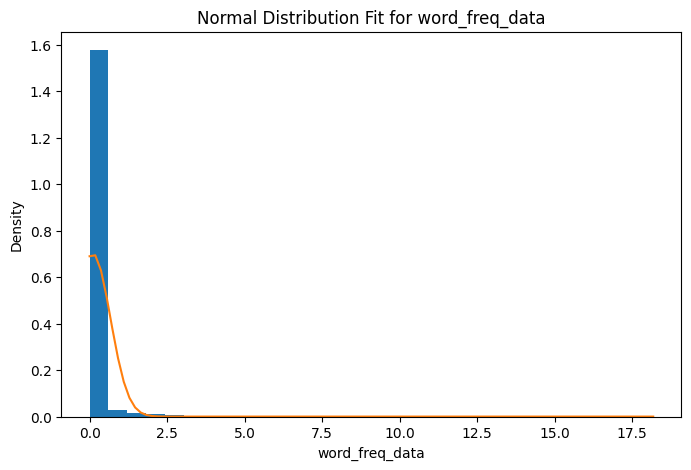

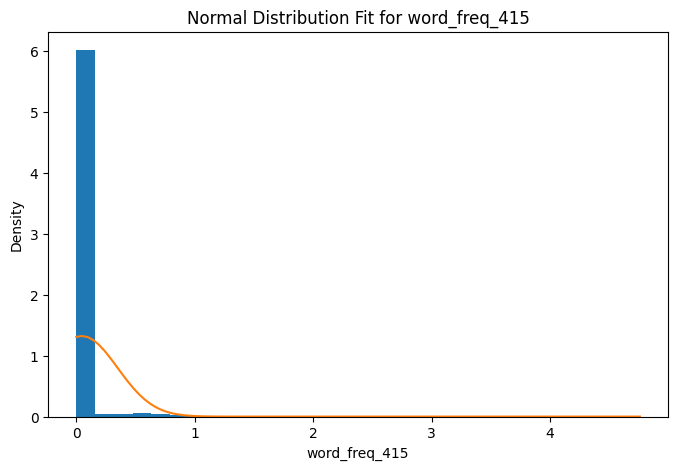

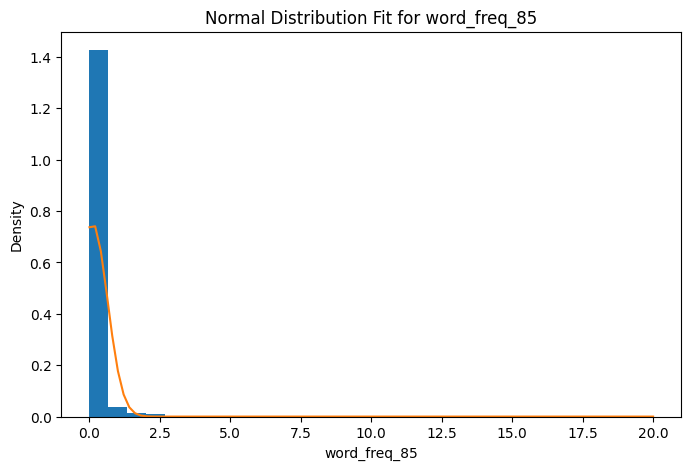

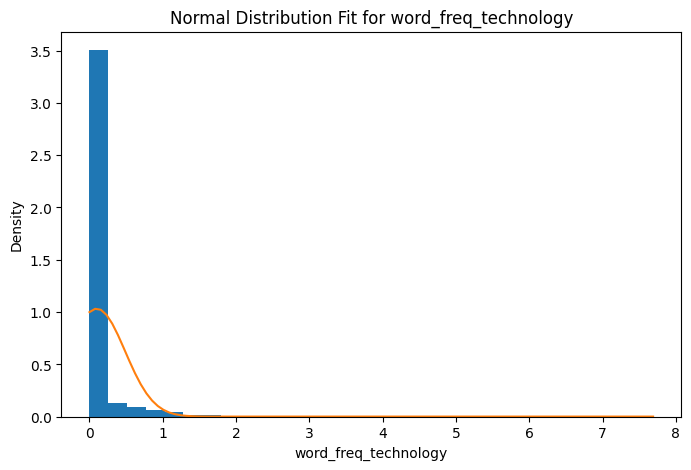

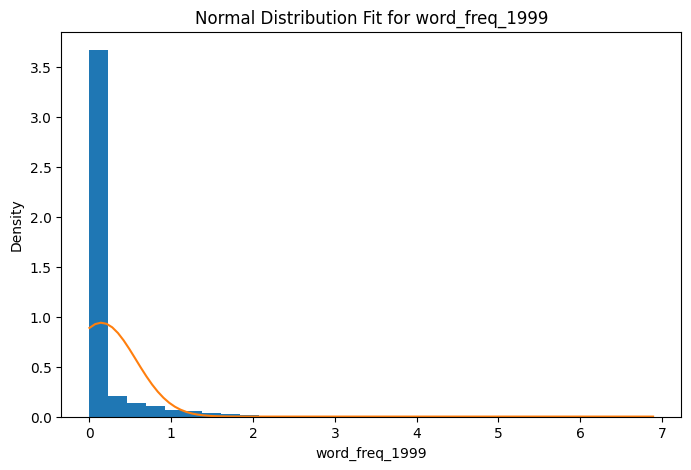

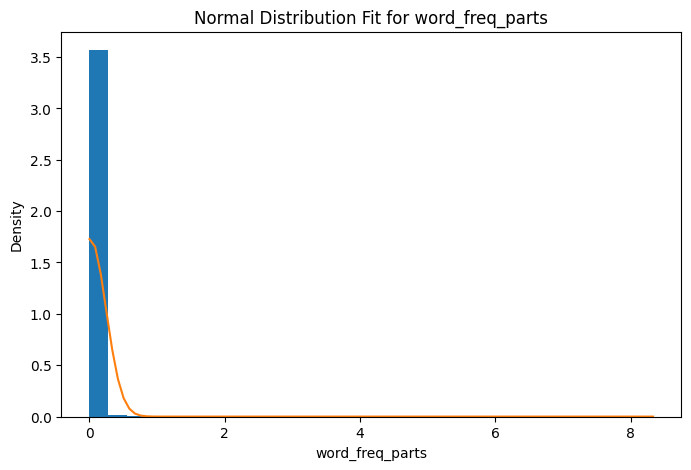

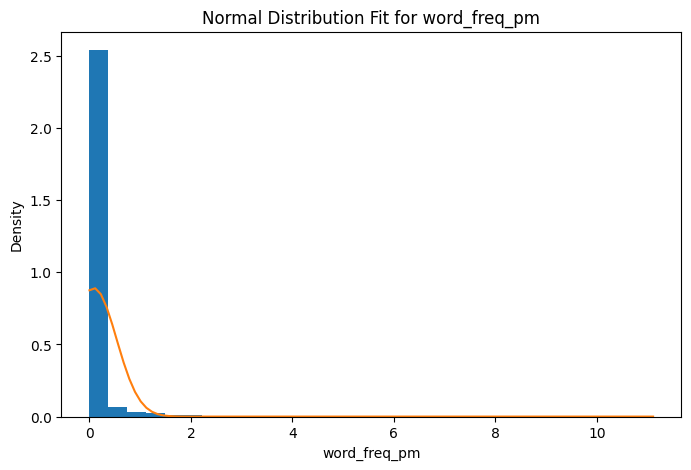

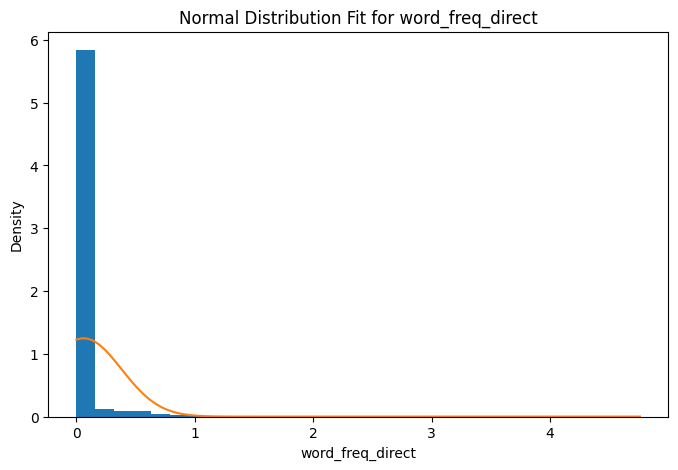

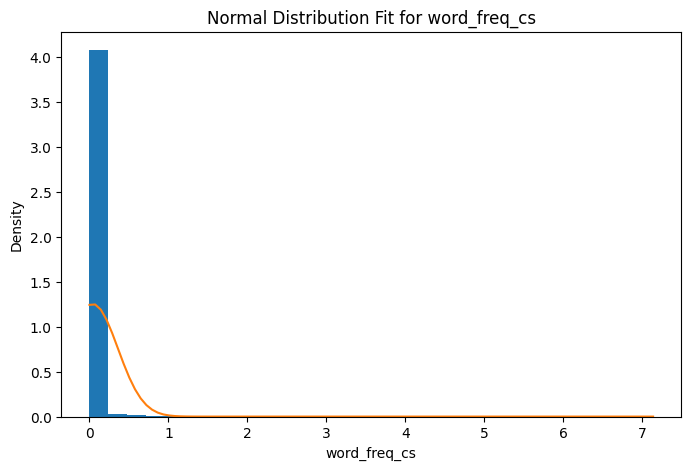

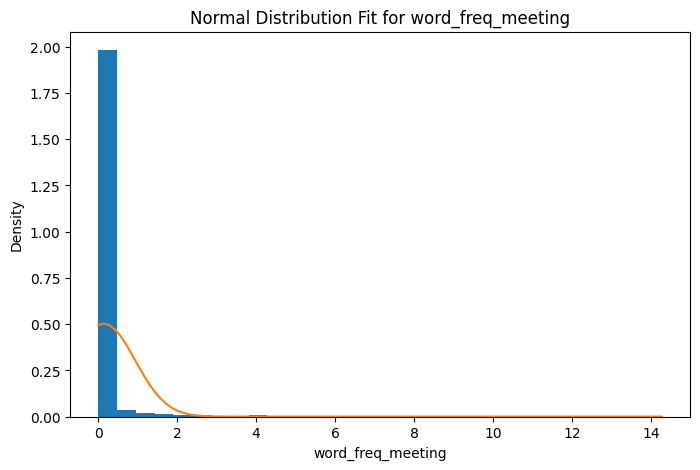

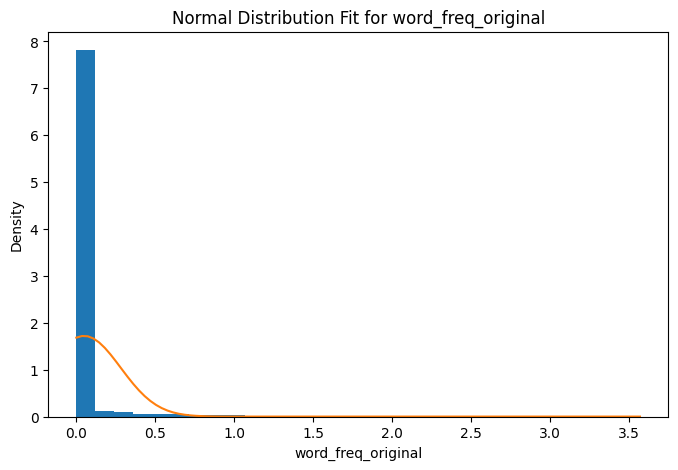

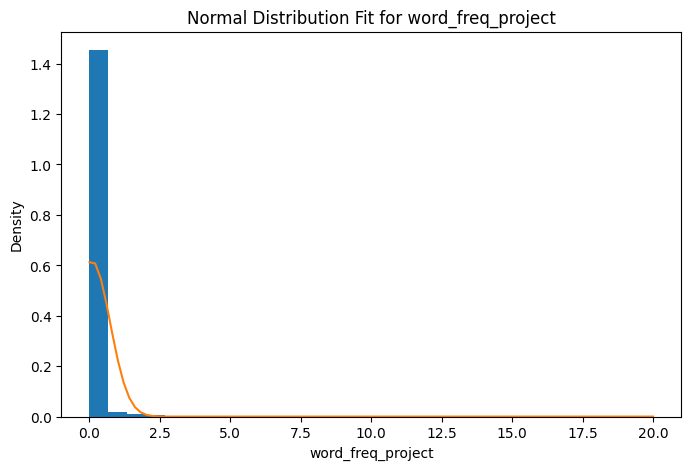

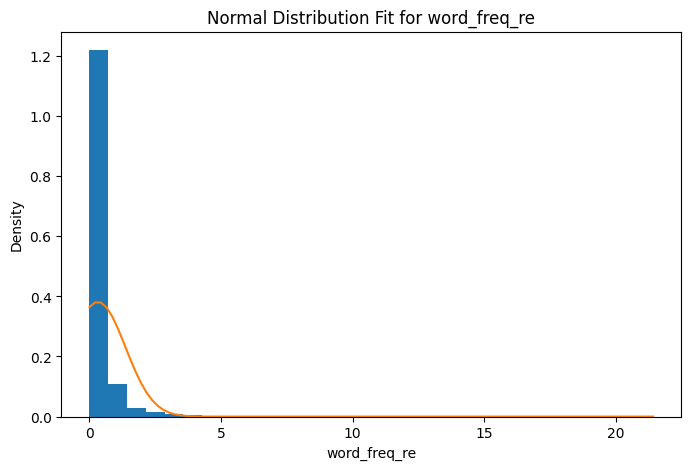

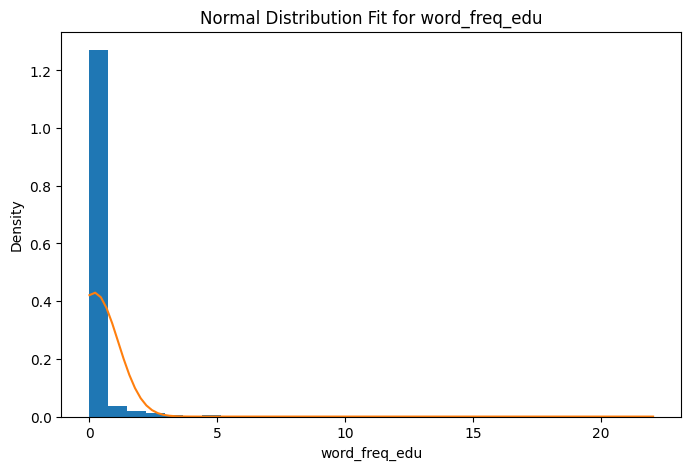

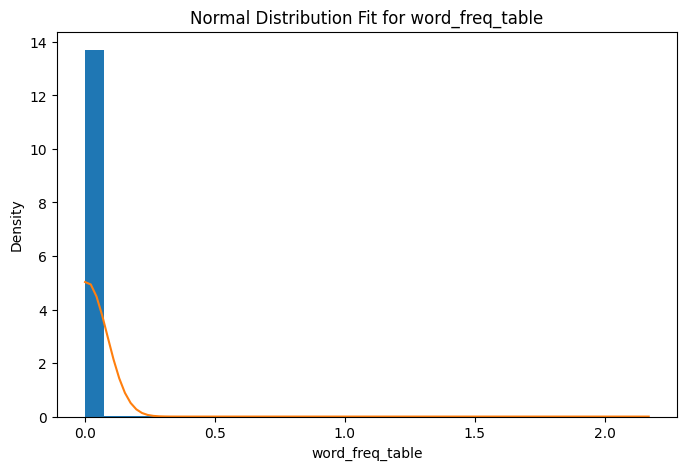

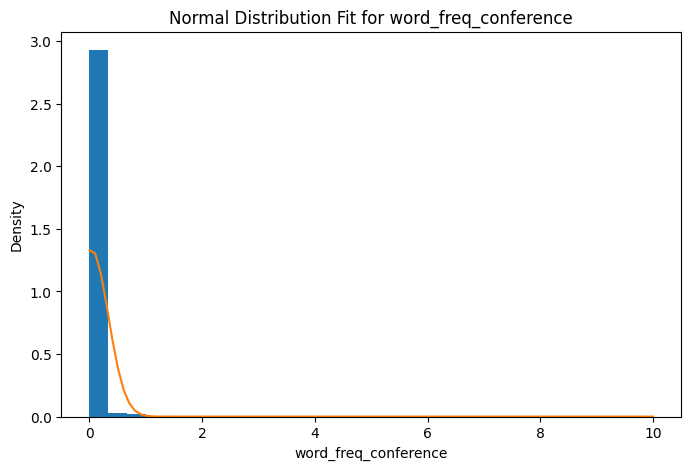

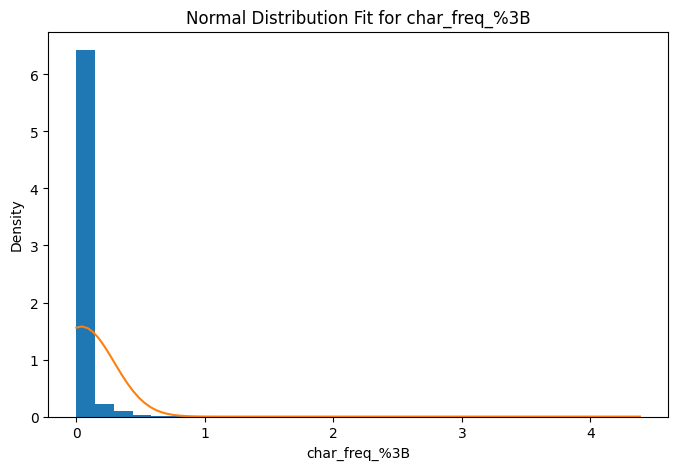

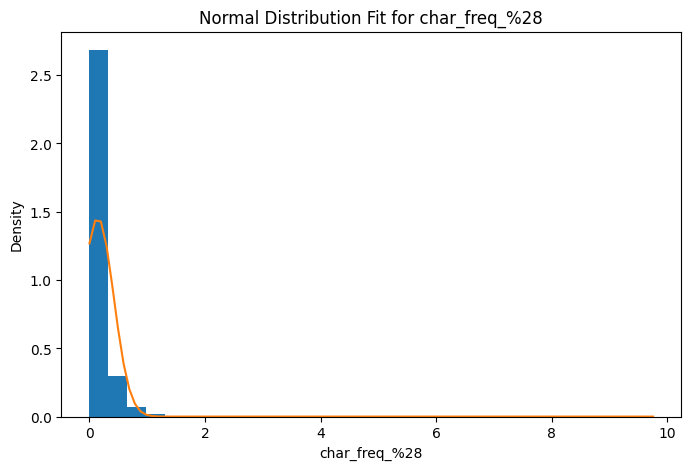

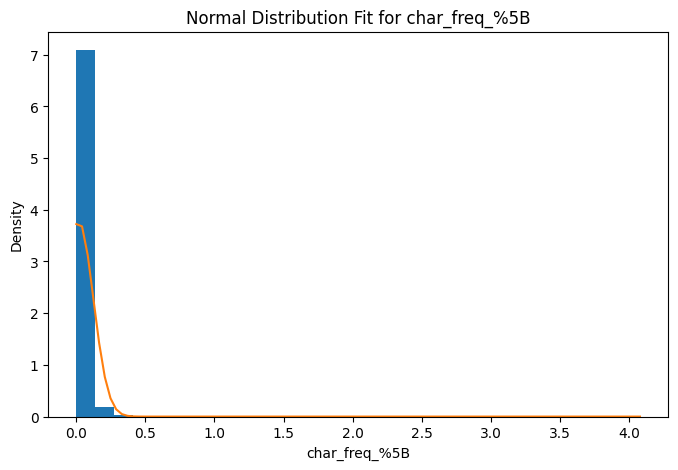

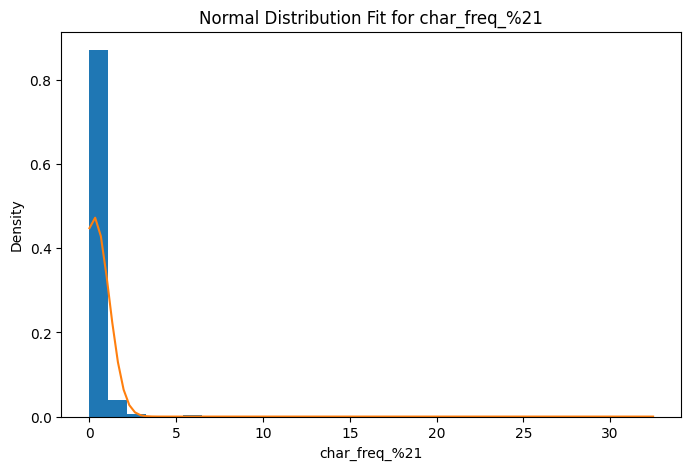

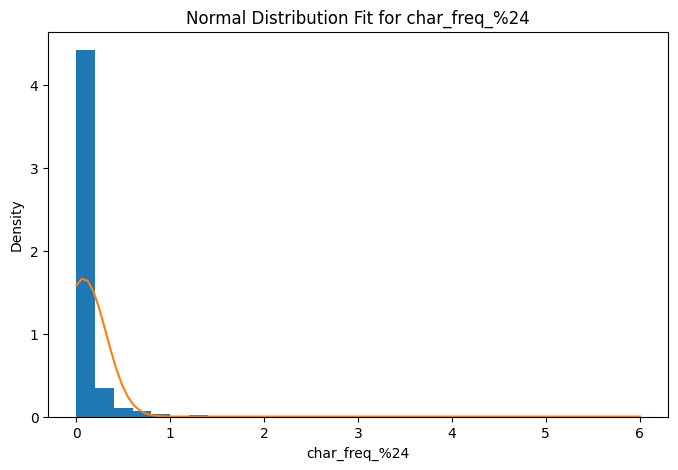

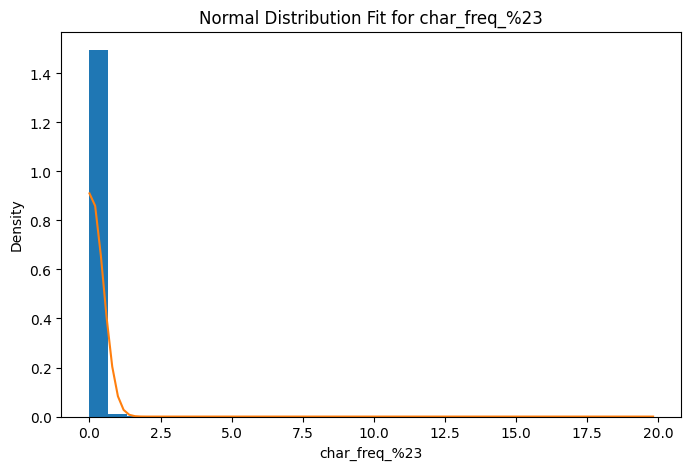

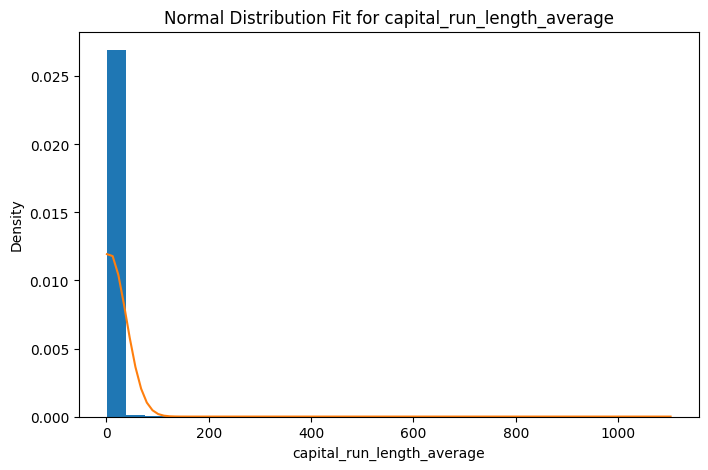

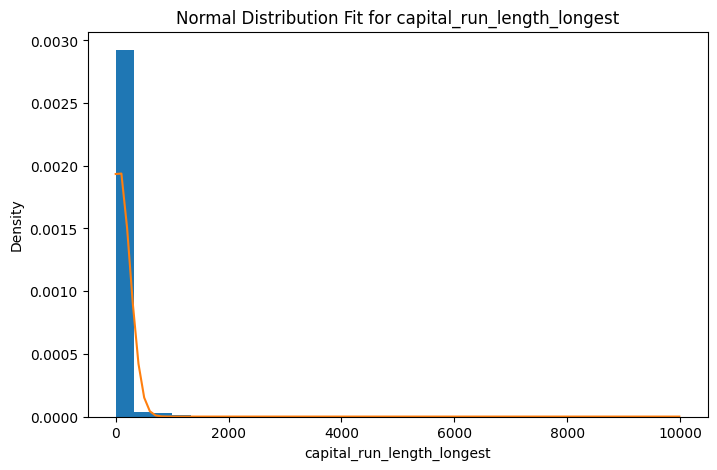

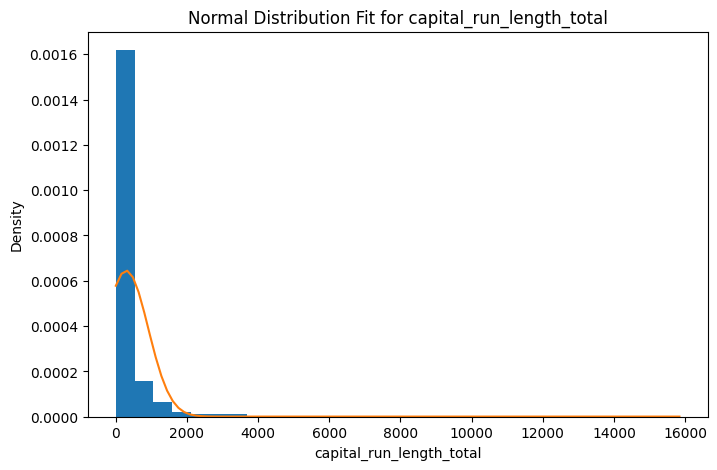

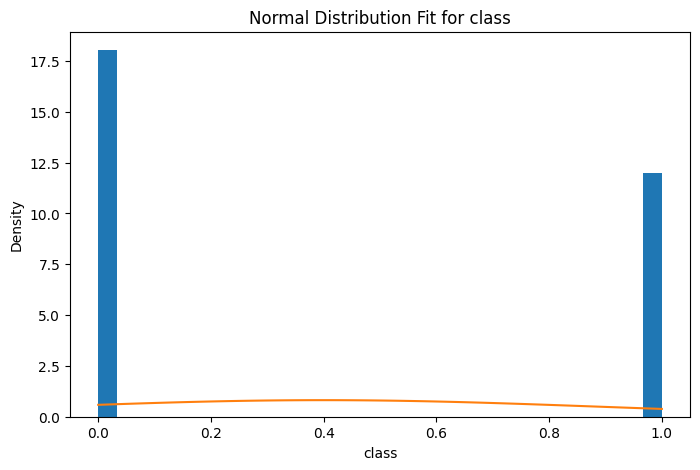

In [64]:
columns = data.columns.tolist()

for col in columns:
    # Skip non-numeric columns
    if not pd.api.types.is_numeric_dtype(data[col]):
        continue

    var = data[col].dropna()

    mu, sigma = var.mean(), var.std()
    plt.figure(figsize=(8,5))

    # Plot histogram of the column
    plt.hist(var, bins=30, density=True)

    # Create x values
    xmin, xmax = var.min(), var.max()
    x = np.linspace(xmin, xmax, 100)

    # Plot normal distribution curve
    plt.plot(x, norm.pdf(x, mu, sigma))

    plt.title(f"Normal Distribution Fit for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

# Scaling the data

In [94]:
#RobustScaler is used instead of StandardScaler or MinMaxScaler because the distribution is highly skewed
from sklearn.preprocessing import RobustScaler

In [66]:
scaler = RobustScaler()

In [67]:
df = data

In [68]:
y = df["class"]
X = df.drop("class",axis=1)

In [69]:
print(X)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

In [70]:
X = scaler.fit_transform(X)

In [71]:
print(X)

[[ 0.          0.64        1.45454545 ...  0.70169532  1.24324324
   0.75508021]
 [ 0.21        0.28        1.13636364 ...  1.35481544  2.32432432
   3.96363636]
 [ 0.06        0.          1.61363636 ...  3.61861248 12.7027027
   9.22994652]
 ...
 [ 0.3         0.          0.68181818 ... -0.42948178 -0.24324324
   0.07058824]
 [ 0.96        0.          0.         ... -0.55308404 -0.27027027
  -0.10053476]
 [ 0.          0.          1.47727273 ... -0.50354695 -0.27027027
  -0.2631016 ]]


In [72]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Train of SVM using different kernels and evaluate it's performance

In [83]:
model = svm.SVC(kernel='linear')

In [84]:
beta = svm.SVC(kernel='poly')

In [85]:
zeta = svm.SVC(kernel='sigmoid')

In [86]:
gamma = svm.SVC(kernel='rbf',C=1,gamma=0.1)

In [87]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [88]:
beta.fit(X_train,y_train)

SVC(kernel='poly')

In [89]:
zeta.fit(X_train,y_train)


SVC(kernel='sigmoid')

In [90]:
gamma.fit(X_train,y_train)


SVC(C=1, gamma=0.1)

In [91]:
model_pred = model.predict(X_test)
beta_pred = beta.predict(X_test)
zeta_pred = zeta.predict(X_test)
gamma_pred = gamma.predict(X_test)

In [92]:
from sklearn.metrics import classification_report

# Performance Evaluation

In [93]:
#for linear kernel 
report_1 = classification_report(y_test,model_pred)
print(report_1)

#for polynomial kernel
report_2 = classification_report(y_test,model_pred)
print(report_2)

#for sigmoid kernel
report_3 = classification_report(y_test,model_pred)
print(report_3)

#for Gussian Radial Basic Function (RBF)
report_4 = classification_report(y_test,model_pred)
print(report_4)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       614
           1       0.94      0.87      0.90       439

    accuracy                           0.92      1053
   macro avg       0.93      0.91      0.92      1053
weighted avg       0.92      0.92      0.92      1053

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       614
           1       0.94      0.87      0.90       439

    accuracy                           0.92      1053
   macro avg       0.93      0.91      0.92      1053
weighted avg       0.92      0.92      0.92      1053

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       614
           1       0.94      0.87      0.90       439

    accuracy                           0.92      1053
   macro avg       0.93      0.91      0.92      1053
weighted avg       0.92      0.92      0.92      1053

              preci